In [3]:
import torch
print(torch.__version__)
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

1.12.1


In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [5]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [7]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [9]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [11]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [13]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303025  [   64/60000]
loss: 2.290833  [ 6464/60000]
loss: 2.266213  [12864/60000]
loss: 2.259584  [19264/60000]
loss: 2.253143  [25664/60000]
loss: 2.207465  [32064/60000]
loss: 2.229239  [38464/60000]
loss: 2.183701  [44864/60000]
loss: 2.178382  [51264/60000]
loss: 2.151215  [57664/60000]
Test Error: 
 Accuracy: 41.3%, Avg loss: 2.144137 

Epoch 2
-------------------------------
loss: 2.159000  [   64/60000]
loss: 2.151577  [ 6464/60000]
loss: 2.087131  [12864/60000]
loss: 2.100479  [19264/60000]
loss: 2.058055  [25664/60000]
loss: 1.988757  [32064/60000]
loss: 2.034165  [38464/60000]
loss: 1.944499  [44864/60000]
loss: 1.951183  [51264/60000]
loss: 1.881575  [57664/60000]
Test Error: 
 Accuracy: 55.3%, Avg loss: 1.873730 

Epoch 3
-------------------------------
loss: 1.914175  [   64/60000]
loss: 1.885376  [ 6464/60000]
loss: 1.757824  [12864/60000]
loss: 1.799788  [19264/60000]
loss: 1.688067  [25664/60000]
loss: 1.640366  [32064/600

In [14]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [15]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [16]:
import torch
import numpy as np

In [17]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [18]:
x_data

tensor([[1, 2],
        [3, 4]])

In [19]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6176, 0.8045, 0.8505],
        [0.1892, 0.8879, 0.8778]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [20]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# PyTorch Fundamentals

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

1.12.1


In [22]:
scalar= torch.tensor(7)
scalar

tensor(7)

In [23]:
scalar.ndim

0

In [24]:
scalar.item()

7

In [2]:
#vector
vector= torch.tensor([7,8,10,88])
vector

tensor([ 7,  8, 10, 88])

In [3]:
# one square bracket []
vector.ndim

1

In [27]:
vector.shape

torch.Size([2])

In [6]:
#MATRIX
MATRIX= torch.tensor([[7,8,10],[9,10,4],[7,8,9],[70,80,90]])
MATRIX

tensor([[ 7,  8, 10],
        [ 9, 10,  4],
        [ 7,  8,  9],
        [70, 80, 90]])

In [7]:
## two square bracket [[]]
MATRIX.ndim

2

In [8]:
MATRIX.shape

torch.Size([4, 3])

In [37]:
#Tensor

TENSOR= torch.tensor( [ [[1,2,3],
                            [4,5,6],
                             [7,8,9]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [38]:
TENSOR.ndim

3

In [39]:
TENSOR.shape

torch.Size([1, 3, 3])

In [40]:
TENSOR[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [41]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.9281, 0.5697, 0.8790, 0.6163],
        [0.4897, 0.5605, 0.7299, 0.2061],
        [0.6332, 0.4258, 0.0077, 0.3447]])

In [42]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [43]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [44]:
# Use torch.range() and get deprecated message, use torch.arange()
one_to_ten = torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [45]:
# Creating tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # what datatype is the tensor (e.g. float32 or float16)
                               device=None, # What device is your tensor on
                               requires_grad=False) # whether or not to track gradients with this tensors operations
float_32_tensor

tensor([3., 6., 9.])

In [47]:
float_32_tensor.dtype

In [48]:
float_32_tensor.device

device(type='cpu')

In [49]:
float_32_tensor.dtype

torch.float32

In [50]:
float_32_tensor.shape

torch.Size([3])

In [51]:
some_tensor=torch.rand(3,4)
some_tensor

tensor([[0.6846, 0.0623, 0.6702, 0.0232],
        [0.4699, 0.6445, 0.1540, 0.3728],
        [0.2468, 0.5098, 0.6882, 0.0930]])

In [52]:
some_tensor.shape

torch.Size([3, 4])

In [53]:
tensor = torch.tensor([1, 2, 3])

In [54]:
tensor +10

tensor([11, 12, 13])

In [ ]:
tensor *3

In [57]:
torch.mul(tensor,10)

tensor([10, 20, 30])

In [58]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [59]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 206 µs, sys: 1 µs, total: 207 µs
Wall time: 115 µs


tensor(14)

In [60]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.02 ms


In [61]:
# Shapes for matrix multiplication 
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

# torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul (it's an alias for writing less code)
torch.matmul(tensor_A, tensor_B)
     

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [62]:
tensor_B.T

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [64]:
output = torch.matmul(tensor_A, tensor_B.T)
output

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

In [65]:
x = torch.arange(1, 100, 10)
x, x.dtype

(tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), torch.int64)

In [66]:
# Find the max
torch.max(x), x.max()

(tensor(91), tensor(91))

In [67]:
torch.min(x)

tensor(1)

In [68]:
torch.sum(x)

tensor(460)

In [69]:
# Find the position in tensor that has the maximum value with argmax()
x.argmax()

tensor(9)

In [70]:
# Let's create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [71]:
# Add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [72]:
# Change the view 
z = x.view(1, 9)
z, z.shape
     

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [73]:
# Changing z changes x (because a view of a tensor shares the same memory as the original input)
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [74]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [75]:
# torch.squeeze() - removes all single dimensions from a target tensor
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimensions from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [76]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
x_original = torch.rand(size=(224, 224, 3)) # [height, width, colour_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}") 
print(f"New shape: {x_permuted.shape}") # [colour_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [ ]:
x_original[0, 0, 0] = 728218
x_original[0, 0, 0], x_permuted[0, 0, 0]

In [78]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape
     

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [79]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [80]:
x[0][0]

tensor([1, 2, 3])

In [81]:
x[0][1][1]

tensor(5)

In [82]:
x[:,0]

tensor([[1, 2, 3]])

In [ ]:
# Create a tensor
import torch
x = torch.arange(1, 19).reshape(2, 3, 3)
x, x.shape
     

In [85]:
x[:,0]

In [86]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # warning: when converting from numpy -> pytorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [87]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [88]:
# Let's make some random but reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [89]:
# Check for GPU access with PyTorch
import torch
torch.cuda.is_available()

False

In [92]:
input = torch.randn(128, 20)
input.shape

torch.Size([128, 20])

In [98]:
input[0]

tensor([-1.7191,  0.5333, -1.1904,  0.3421, -0.3002,  1.0045, -0.7728, -0.2725,
        -0.1510, -2.2977, -0.1244, -0.7996,  0.7430, -0.8086, -0.7178,  0.4815,
         0.8880, -1.5327, -0.4972,  0.5914])

In [99]:
m = nn.Linear(20, 30)
#input = torch.randn(128, 20)
output = m(input)
print(output.size())

In [100]:
output[0]

tensor([-0.3996,  0.5377, -0.5393,  0.6153,  1.1100, -0.5914,  0.3513,  0.9759,
        -0.6129,  0.7381,  0.2588, -0.3754,  0.9356,  0.0670, -0.8091,  0.1163,
         0.0356,  0.5197,  0.6767,  0.0508, -0.0627,  0.6696,  1.1691, -0.2108,
        -0.5452,  0.1892, -0.7153,  0.6326, -0.4320,  0.4979],
       grad_fn=<SelectBackward0>)

In [108]:
def greet(name: str)-> str:
    return 'hello '+name
greet('kewei')

'hello kewei'

In [111]:
a=torch.arange(start, end, step)
a

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [112]:
b=a.unsqueeze(dim=1)
b

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [109]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
# https://stackoverflow.com/questions/57237352/what-does-unsqueeze-do-in-pytorch
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 

# print the first 10 rows
X[:10], y[:10]
     

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [113]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] 

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [114]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  # Show the legend
  plt.legend(prop={"size": 14});
     

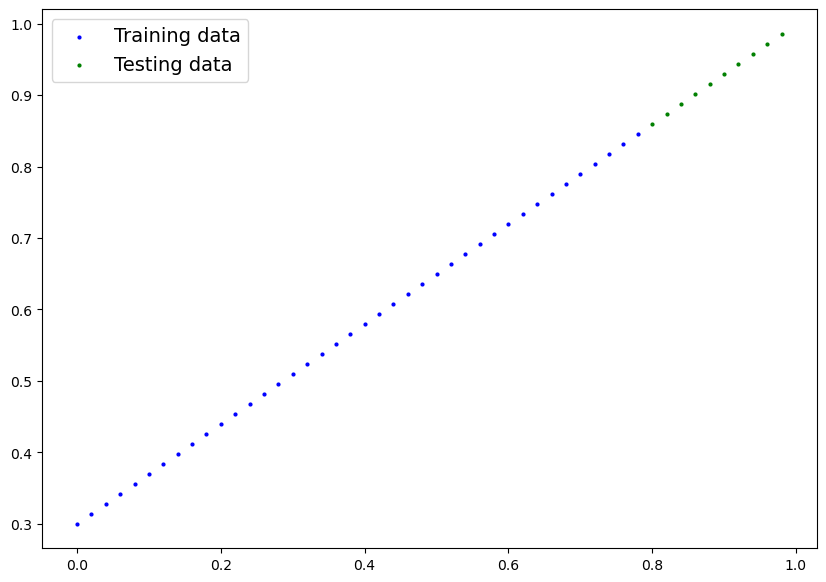

In [115]:
plot_predictions();

In [116]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
    
    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32 
    
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

In [117]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w=nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))
        self.b= nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.w * x + self.b

In [118]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [119]:
# List named parameters
model_0.state_dict()

OrderedDict([('w', tensor([0.3367])), ('b', tensor([0.1288]))])

In [121]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [120]:
y_preds = model_0(X_test)
y_preds
     

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

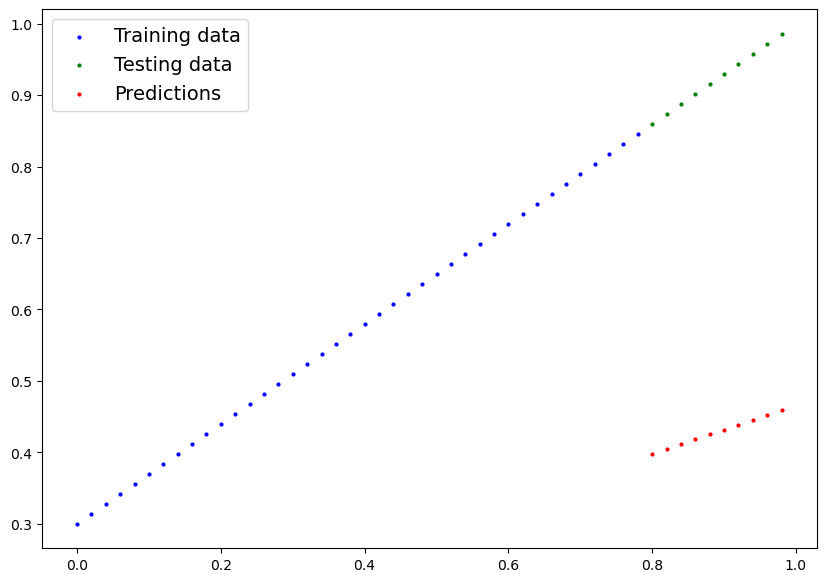

In [123]:
plot_predictions(predictions=y_preds.detach().numpy())

In [124]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), # we want to optimize the parameters present in our model
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

In [125]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.01)

In [126]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = [] 
loss_values = []
test_loss_values = [] 

### Training
# 0. Loop through the data
for epoch in range(epochs): 
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients 

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad() 

  # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=aftDZicoiUGiklEP179x7A
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass 
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('w', tensor([0.3406])), ('b', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('w', tensor([0.3796])), ('b', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('w', tensor([0.4184])), ('b', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('w', tensor([0.4512])), ('b', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('w', tensor([0.4748])), ('b', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('w', tensor([0.4938])), ('b', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('w', tensor([0.5116])), ('b', tensor([0.3788]))])
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805

In [127]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

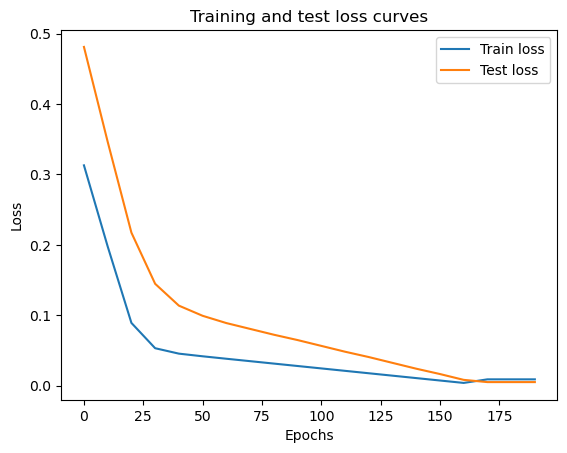

In [128]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [129]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [130]:
model_0.state_dict()

OrderedDict([('w', tensor([0.6990])), ('b', tensor([0.3093]))])

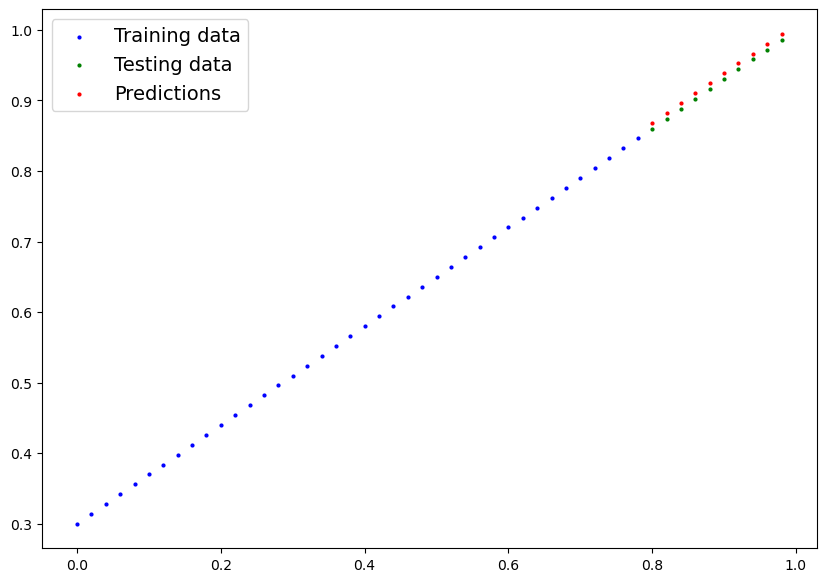

In [131]:
plot_predictions(predictions=y_preds_new);

In [132]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [133]:
!ls

data  model.pth  models


In [134]:

!ls -l models

total 4
-rw-rw----. 1 1000710000 wscommon 1063 May 21 15:10 01_pytorch_workflow_model_0.pth


In [ ]:
#backprogation

#. https://www.youtube.com/watch?v=khUVIZ3MON8

In [137]:
w_o=0.8
lr=0.1
w_t_1= w_o
for i in range(100):
    w_t = w_t_1 - lr*(4.5 * w_t_1 -1.5)
    w_t_1= w_t
    print(f' w_t = {w_t}')

 w_t = 0.5900000000000001
 w_t = 0.47450000000000003
 w_t = 0.41097500000000003
 w_t = 0.37603625
 w_t = 0.3568199375
 w_t = 0.346250965625
 w_t = 0.34043803109375004
 w_t = 0.3372409171015625
 w_t = 0.33548250440585936
 w_t = 0.3345153774232227
 w_t = 0.3339834575827725
 w_t = 0.33369090167052484
 w_t = 0.3335299959187887
 w_t = 0.33344149775533377
 w_t = 0.33339282376543355
 w_t = 0.33336605307098843
 w_t = 0.33335132918904364
 w_t = 0.333343231053974
 w_t = 0.33333877707968573
 w_t = 0.3333363273938271
 w_t = 0.3333349800666049
 w_t = 0.3333342390366327
 w_t = 0.333333831470148
 w_t = 0.3333336073085814
 w_t = 0.3333334840197198
 w_t = 0.3333334162108459
 w_t = 0.33333337891596526
 w_t = 0.33333335840378087
 w_t = 0.33333334712207946
 w_t = 0.3333333409171437
 w_t = 0.333333337504429
 w_t = 0.33333333562743594
 w_t = 0.3333333345950898
 w_t = 0.33333333402729937
 w_t = 0.33333333371501467
 w_t = 0.33333333354325806
 w_t = 0.33333333344879196
 w_t = 0.3333333333968356
 w_t = 0.333333